In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import re

In [2]:
# Load the dataset with specified encoding
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [3]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')] #dropping extra unnamed columns

In [4]:
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Preprocessing

In [5]:
# Download nltk stopwords
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Define stop words
stop_words = set(stopwords.words('english'))

In [7]:
# Function to preprocess the text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [8]:
# Preprocess messages
data['cleaned_message'] = data['v2'].apply(preprocess_text)

# Tokenize the messages
data['tokenized_message'] = data['cleaned_message'].apply(word_tokenize)

# Remove stopwords
data['tokenized_message'] = data['tokenized_message'].apply(lambda x: [word for word in x if word not in stop_words])

1. EDA

In [9]:
# Getting the most frequent words, bi-grams and tri-grams

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [10]:
spam_corpus = data[data['v1']=='spam']['cleaned_message']
ham_corpus = data[data['v1']=='ham']['cleaned_message']

In [11]:
# 10 most frequenct words in each class

spam_words = get_top_ngrams(spam_corpus,1)
ham_words = get_top_ngrams(ham_corpus,1)

# 10 most frequenct bigrams in each class

spam_bigrams = get_top_ngrams(spam_corpus,2)
ham_bigrams = get_top_ngrams(ham_corpus,2)

# 10 most frequenct trigrams in each class

spam_trigrams = get_top_ngrams(spam_corpus,3)
ham_trigrams = get_top_ngrams(ham_corpus,3)

print("Spam words:", spam_words)
print("Ham words:",ham_words)
print("Spam bi-grams:", spam_bigrams)
print("Ham bi-grams:", ham_bigrams)
print("Spam tri-grams:",spam_trigrams)
print("Ham tri-grams:",ham_trigrams)



Spam words: [('call', np.int64(358)), ('you', np.int64(297)), ('your', np.int64(264)), ('free', np.int64(226)), ('the', np.int64(206)), ('for', np.int64(203)), ('now', np.int64(200)), ('txt', np.int64(170)), ('have', np.int64(135)), ('from', np.int64(132))]
Ham words: [('you', np.int64(1943)), ('the', np.int64(1123)), ('and', np.int64(857)), ('that', np.int64(551)), ('for', np.int64(501)), ('have', np.int64(440)), ('can', np.int64(439)), ('but', np.int64(434)), ('your', np.int64(417)), ('not', np.int64(415))]
Spam bi-grams: [('you have', np.int64(73)), ('call now', np.int64(61)), ('have won', np.int64(54)), ('your mobile', np.int64(50)), ('call from', np.int64(48)), ('please call', np.int64(46)), ('you are', np.int64(37)), ('find out', np.int64(28)), ('guaranteed call', np.int64(23)), ('for your', np.int64(22))]
Ham bi-grams: [('are you', np.int64(178)), ('you are', np.int64(94)), ('when you', np.int64(69)), ('for the', np.int64(58)), ('you know', np.int64(55)), ('you want', np.int64(5

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_63372\3326893385.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts, y=words, palette='viridis')


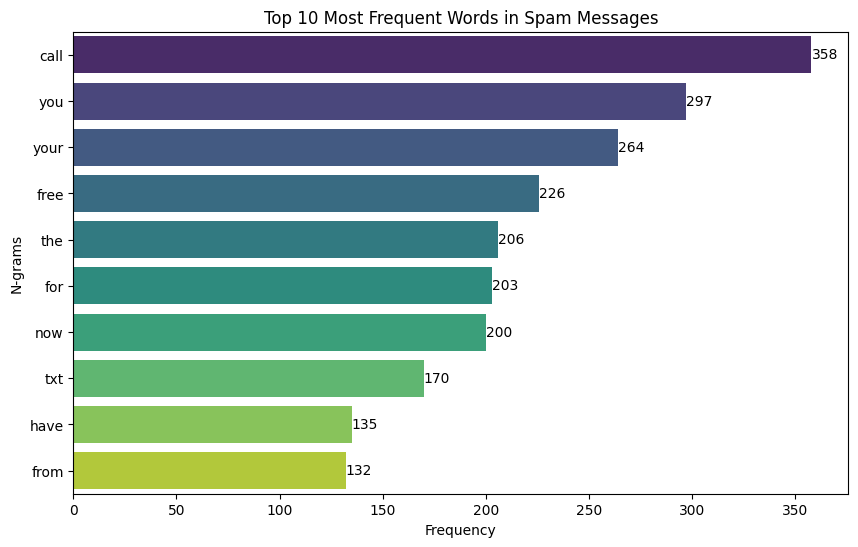

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_63372\3326893385.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts, y=words, palette='viridis')


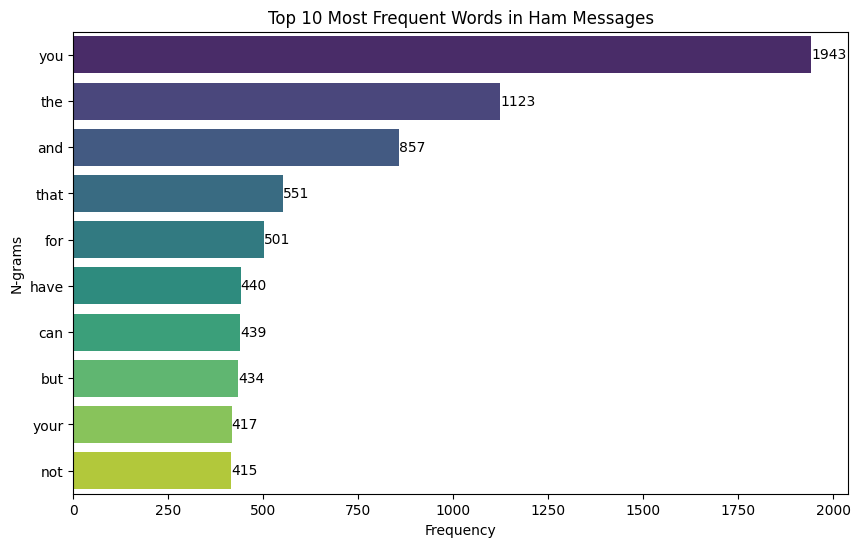

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_63372\3326893385.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts, y=words, palette='viridis')


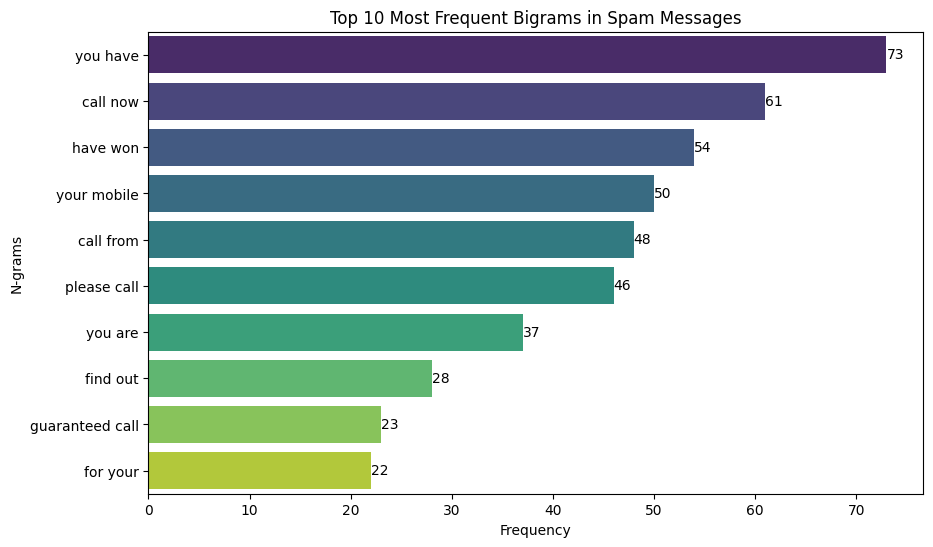

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_63372\3326893385.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts, y=words, palette='viridis')


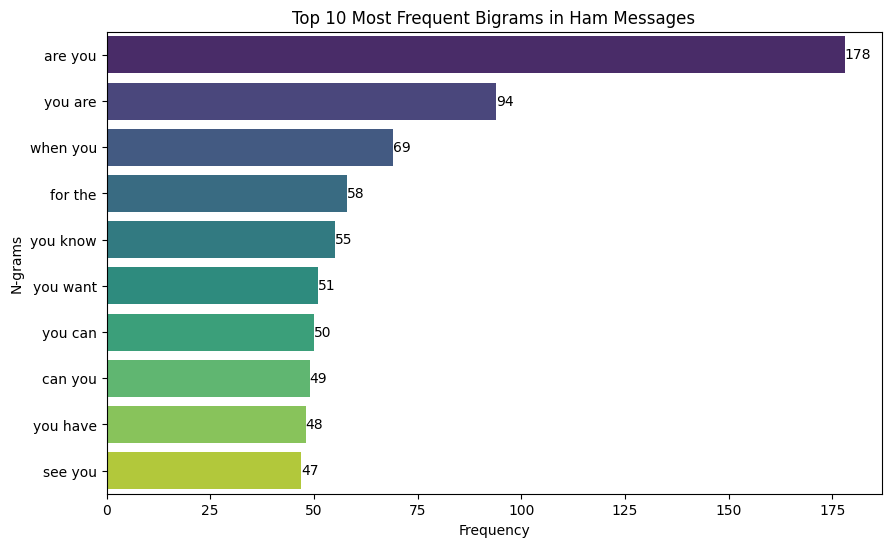

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_63372\3326893385.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts, y=words, palette='viridis')


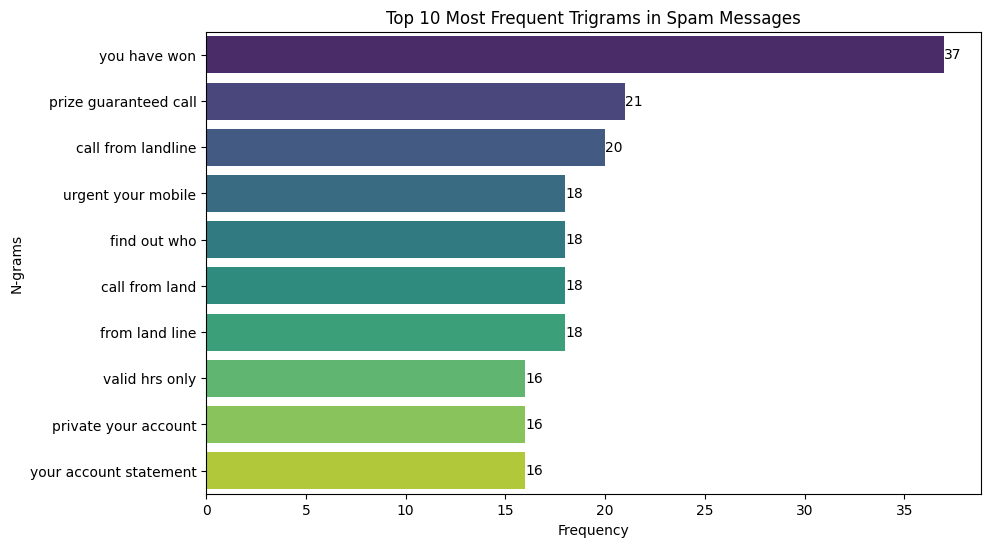

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_63372\3326893385.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts, y=words, palette='viridis')


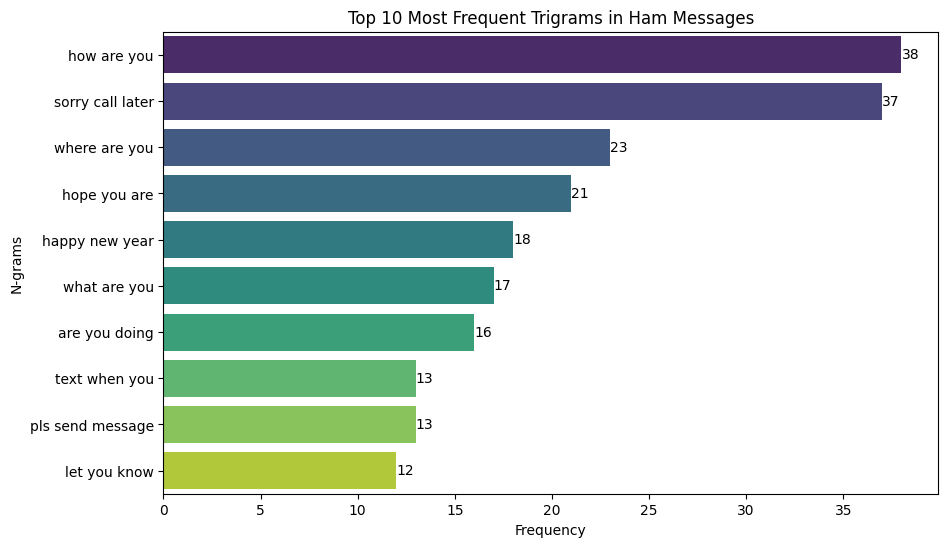

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_top_ngrams(ngrams, title):
    words = [item[0] for item in ngrams]
    counts = [item[1] for item in ngrams]
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=counts, y=words, palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('N-grams')
    
    # Add frequency values on top of the bars
    for index, value in enumerate(counts):
        ax.text(value, index, f'{value}', color='black', ha="left", va="center")
    
    plt.show()
    
# 10 most frequent words in each class
plot_top_ngrams(spam_words, 'Top 10 Most Frequent Words in Spam Messages')
plot_top_ngrams(ham_words, 'Top 10 Most Frequent Words in Ham Messages')

# 10 most frequent bigrams in each class
plot_top_ngrams(spam_bigrams, 'Top 10 Most Frequent Bigrams in Spam Messages')
plot_top_ngrams(ham_bigrams, 'Top 10 Most Frequent Bigrams in Ham Messages')

# 10 most frequent trigrams in each class
plot_top_ngrams(spam_trigrams, 'Top 10 Most Frequent Trigrams in Spam Messages')
plot_top_ngrams(ham_trigrams, 'Top 10 Most Frequent Trigrams in Ham Messages')


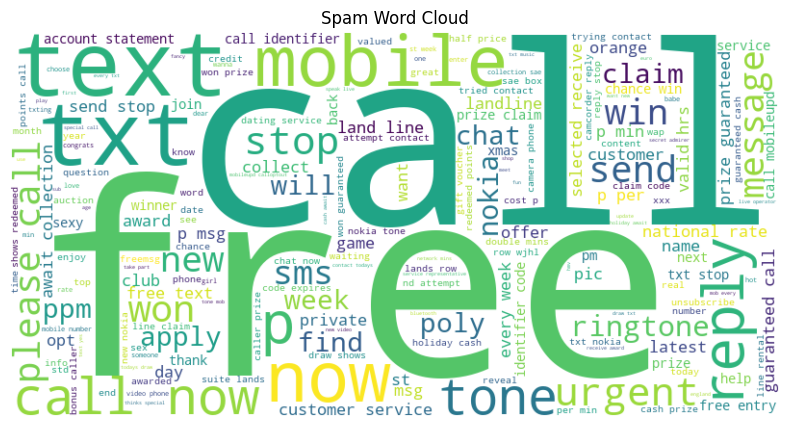

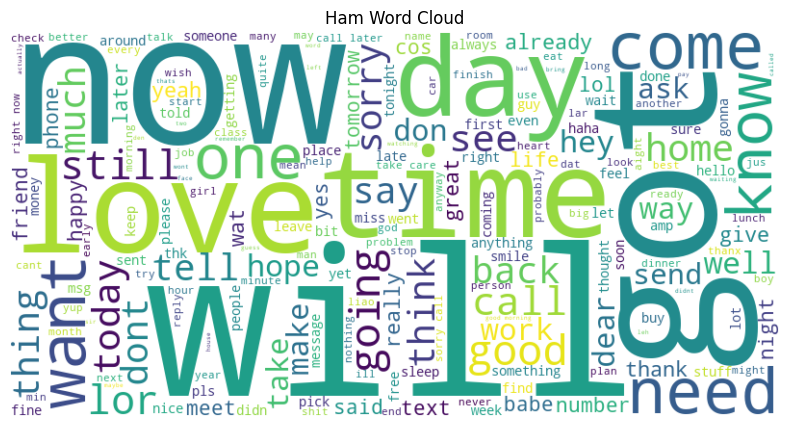

In [14]:
# Generating word clouds

def generate_wordcloud(text,title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(data[data['v1']=='spam']['cleaned_message'], "Spam Word Cloud")
generate_wordcloud(data[data['v1']=='ham']['cleaned_message'], "Ham Word Cloud")

2. Convert the text to vectors using Bag-of-words model

In [15]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(data['cleaned_message'])

In [16]:
# Labels
y = data['v1'].apply(lambda x: 1 if x == 'spam' else 0)

In [17]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2,random_state=42)

3. Apply an ML model and Record the F-1 Score

In [18]:
# Training a logistic regression model

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
# Predict and evaluate
y_pred = model.predict(X_test)
f1_bow = f1_score(y_test, y_pred)
print(f"F1 Score with Bag-of-Words: {f1_bow}")

F1 Score with Bag-of-Words: 0.9018181818181819


4. Repeating the steps with Tf-IDF vectors

In [20]:
# Vectorize text using Tf-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_message'])

In [21]:
#Splitting the data
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [22]:
model_tfidf = LogisticRegression()
model_tfidf.fit(X_train_tfidf,y_train_tfidf)

LogisticRegression()

In [23]:
# Predict and evaluate
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf)
print(f"F1 Score with Tf-IDF: {f1_tfidf}")

F1 Score with Tf-IDF: 0.8156862745098039


5. Repeating Tf-IDF after preprocessing the text

In [24]:
# Function for text preprocessing
def text_preprocessing(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [25]:
# Apply text preprocessing
data['preprocessed_message'] = data['v2'].apply(text_preprocessing)


In [26]:
# Tokenize, remove stopwords, and apply lemmatization
lemmatizer = nltk.WordNetLemmatizer()
nltk.download('wordnet')

def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
data['preprocessed_message'] = data['preprocessed_message'].apply(tokenize_and_lemmatize)


In [28]:
# Vectorize text using Tf-IDF
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(data['preprocessed_message'])

# Split the data
X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, y_train_tfidf_preprocessed, y_test_tfidf_preprocessed = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)


In [29]:
model_tfidf_preprocessed = LogisticRegression()
model_tfidf_preprocessed.fit(X_train_tfidf_preprocessed,y_train_tfidf_preprocessed)

LogisticRegression()

In [30]:
# Predict and evaluate
y_pred_tfidf_preprocessed = model_tfidf_preprocessed.predict(X_test_tfidf_preprocessed)
f1_tfidf_preprocessed = f1_score(y_test_tfidf_preprocessed, y_pred_tfidf_preprocessed)
print(f"F1 Score with Tf-IDF and Preprocessing: {f1_tfidf_preprocessed}")

F1 Score with Tf-IDF and Preprocessing: 0.7698412698412699


6. List out scores of each model

In [31]:
print("F1 Scores of Different Models:")
print(f"Bag-of-Words: {f1_bow}")
print(f"Tf-IDF: {f1_tfidf}")
print(f"Tf-IDF with Preprocessing: {f1_tfidf_preprocessed}")

F1 Scores of Different Models:
Bag-of-Words: 0.9018181818181819
Tf-IDF: 0.8156862745098039
Tf-IDF with Preprocessing: 0.7698412698412699


Inference:
The Bag-of-Words model has the highest F1 score among the three approaches. 
The TF-IDF model performed well but not as effectively as the Bag-of-Words model. 
Adding text preprocessing steps to the TF-IDF model resulted in a lower F1 score compared to the other two approaches. In this case, preprocessing might have removed some information which might have been crucial for classification.